# Join the data from Part 1 with the data from Part 2 to create a new dataframe.

### Import required librairies and modules

In [75]:
# Import required librairies and modules
import os   #used to access the values of environment variables
import requests #send api requests
import json # to read json files
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

### Initial Observations

When doing the API pulls from Foursquare and Yelp, I added the number of results from each API into the citybikes_df. 

I also added the bikestation_id to both Yelp and Foursquare, so joining the data of all three tables (Foursquare, Yelp, and citybikes) should be rather easy.

### Loading & Merging Data

In [76]:
# Import dataframes via CSV

## CityBikes
citybikes_df = pd.read_csv('Vancouver_BikeStation_Enriched.csv') 

## Foursquare
fsq_df = pd.read_csv('Foursquare_venues.csv') 

## Yelp
yelp_df = pd.read_csv('Yelp_venues.csv')

In [77]:
# We will be merging all 3x dataframes using the citybikes_df ID, also called the bikestation_id in the Yelp & Foursquare DF.

## To ensure we won't run in any problems, we'll rename the id in citybikes_df to bikestation_id so all 3x columns are named the same.
citybikes_df.rename(columns={'id':'bikestation_id'}, inplace=True)
citybikes_df.head()

,Unnamed: 0.1,Unnamed: 0,empty_slots,free_bikes,bikestation_id,latitude,longitude,name,extra.slots,foursquare_venues,yelp_venues
0,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,264
1,1,1,4,12,32603a87cfca71d0f7dfa3513bad69d5,49.274566,-123.121817,0004 Yaletown-Roundhouse Station,16,50,589
2,2,2,0,26,6d42fa40360f9a6b2bf641c7b8bb2862,49.279764,-123.110154,0005 Dunsmuir & Beatty,26,50,819
3,3,3,10,6,66f873d641d448bd1572ab086665a458,49.260599,-123.113504,0007 12th & Yukon (City Hall),16,50,274
4,4,4,6,10,485d4d24c803cfde829ab89699fed833,49.264215,-123.117772,0008 8th & Ash,16,50,202


Now we'll merge the 3x dataframes into one:

In [78]:
joined_df = pd.merge(citybikes_df, fsq_df, on='bikestation_id', how='left')
joined_df = pd.merge(joined_df, yelp_df, on='bikestation_id', how='left')

joined_df.head()

,Unnamed: 0.1,Unnamed: 0_x,empty_slots,free_bikes,bikestation_id,latitude,longitude,name_x,extra.slots,foursquare_venues,...,fsq_id,categories_x,name_y,rating_x,Unnamed: 0,id,name,review_count,categories_y,rating_y
0,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,0,6iOAgzJ0DRZNSKA3FSrrOg,La Taqueria Pinche Taco Shop,668,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0
1,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,1,AEOyRbQtYD3bmX1qJWvt4g,Peaceful Restaurant,610,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.5
2,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,2,NensKn1MSVU_rm-1Y6WlFA,Marulilu Cafe,281,"[{'alias': 'cafes', 'title': 'Cafes'}]",4.0
3,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,3,nkDZY5xqihF3XtZMzzfqqg,Hokkaido Ramen Santouka,218,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",4.0
4,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,4,XAH2HpuUUtu7CUO26pbs4w,Saku,182,"[{'alias': 'japanese', 'title': 'Japanese'}]",4.0


### Cleaning the merged dataframe

Okay this is not clean and hard to keep track of, let's rename some columns:

In [79]:
joined_df.rename(columns={'name_x':'bikestation_name', 'rating_x':'fsq_rating', 'id':'yelp_id', 'name':'venue_name', 'review_count':'yelp_review_count', 'rating_y':'yelp_rating'}, inplace=True)

In [80]:
joined_df.head()

,Unnamed: 0.1,Unnamed: 0_x,empty_slots,free_bikes,bikestation_id,latitude,longitude,bikestation_name,extra.slots,foursquare_venues,...,fsq_id,categories_x,name_y,fsq_rating,Unnamed: 0,yelp_id,venue_name,yelp_review_count,categories_y,yelp_rating
0,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,0,6iOAgzJ0DRZNSKA3FSrrOg,La Taqueria Pinche Taco Shop,668,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0
1,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,1,AEOyRbQtYD3bmX1qJWvt4g,Peaceful Restaurant,610,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.5
2,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,2,NensKn1MSVU_rm-1Y6WlFA,Marulilu Cafe,281,"[{'alias': 'cafes', 'title': 'Cafes'}]",4.0
3,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,3,nkDZY5xqihF3XtZMzzfqqg,Hokkaido Ramen Santouka,218,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",4.0
4,0,0,14,21,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,35,50,...,5674aec9498e6800815c3598,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",Vij's,9.0,4,XAH2HpuUUtu7CUO26pbs4w,Saku,182,"[{'alias': 'japanese', 'title': 'Japanese'}]",4.0


### Discovery of an issue in the merging process

Now hang on a second... it appears our table didn't join properly.. 
When you look closely.. the Foursquare name, category and rating is different than our Yelp's.. 

It seems that merging from bikesession_id is not enough.. it still mixes the different restaurants..  We need to find a second value, a common value between Foursquare and Yelp. As they have different IDs, the only possibility would be the names.

In [81]:
# Comparing the name values between Yelp and Foursquare
print("Yelp in Foursquare:")
print(yelp_df['name'].isin(fsq_df['name']).value_counts())
print("----------------")
print("Foursquare in Yelp:")
print(fsq_df['name'].isin(yelp_df['name']).value_counts())


Yelp in Foursquare:
False    7058
True     4752
Name: name, dtype: int64
----------------
Foursquare in Yelp:
False    6999
True     4602
Name: name, dtype: int64


It's more than I expected.. but still not enough.. 

We could try to bring back the address of the venues, but I fear we're at risk of facing the same formatting issues. 

### Conclusion

My conclusion is we can't fully join all this data into a single table. At least in its current state. It is as joined as it can be. 

We'll be having three tables, with bikestation_id as the joining key between yelp_df and bikecity_df as well as between fsq_df and bikecity_df. 

We will have no way to join yelp to foursquare.

# Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<AxesSubplot: ylabel='Count'>

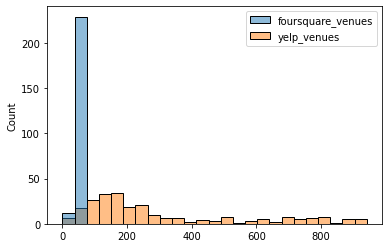

In [82]:
# Let's create a histogram to see if Yelp is indeed providing more results than Foursquare

sns.histplot(citybikes_df[['foursquare_venues', 'yelp_venues']])

<AxesSubplot: ylabel='Count'>

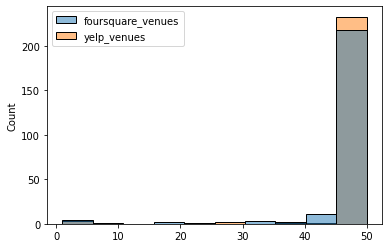

In [83]:
#Having yelp venues not capped is not helping in this case.. Will remedy that
citybikes_df.loc[citybikes_df['yelp_venues'] > 50, 'yelp_venues'] = 50

#let's try again
sns.histplot(citybikes_df[['foursquare_venues', 'yelp_venues']])

<AxesSubplot: ylabel='Count'>

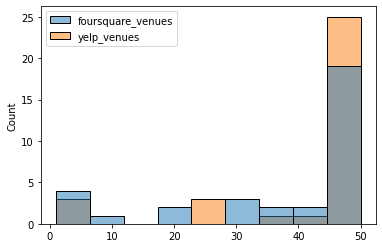

In [84]:
#Ok it appears so.. at least for the 50s. Let's filter 50 out so we can see the other values better:
sns.histplot(citybikes_df.loc[citybikes_df['foursquare_venues'] < 50, ['foursquare_venues', 'yelp_venues']])

We can conclude that Yelp provides more returns than Foursquare. Why? this remains to be determined. More doesn't necessary means better. 

Nevertheless, I'll be using the help venues for the remainder of this project. I'll admit the fact that the values are not capped at 50 will likely be more useful in my case as well

# Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

### Create the DB

In [2]:
#Creating the DB
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [3]:
connection = create_connection("lhl_stat_mod_proj.sqlite")

Connection to SQLite DB successful


### Create the tables

We'll create three tables:
1. bikestations
2. yelp_venues
3. foursquare_venues

In [4]:
# Function to execute SQL queries
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [45]:
# SQL Query to create the bikestations table
create_bikestations_table = """
CREATE TABLE IF NOT EXISTS bikestations (
  bikestation_id TEXT PRIMARY KEY NOT NULL,
  name TEXT,
  empty_slots INTEGER,
  free_bikes INTEGER,
  slots INTEGER,
  latitude TEXT,
  longitude TEST,
  foursquare_venues INTEGER NOT NULL,
  yelp_venues INTEGER NOT NULL
);
"""

In [46]:
# Execute the query to create this table:
execute_query(connection, create_bikestations_table)

Query executed successfully


In [47]:
# SQL Query to create the yelp_venues table
create_yelp_table = """
CREATE TABLE IF NOT EXISTS yelp_venues (
  id TEXT PRIMARY KEY NOT NULL,
  name TEXT,
  review_count INTEGER,
  rating INTEGER,
  bikestation_id TEXT NOT NULL,
  FOREIGN KEY (bikestation_id) REFERENCES bikestations (bikestation_id)
);
"""

In [48]:
# SQL Query to create the foursquare_venues table
create_foursquare_table = """
CREATE TABLE IF NOT EXISTS foursquare_venues (
  fsq_id TEXT PRIMARY KEY NOT NULL,
  name TEXT,
  rating INTEGER,
  bikestation_id TEXT NOT NULL,
  FOREIGN KEY (bikestation_id) REFERENCES bikestations (bikestation_id)
);
"""

In [49]:
# Execute the queries to create those tables:
execute_query(connection, create_yelp_table)
execute_query(connection, create_foursquare_table)

Query executed successfully
Query executed successfully


### Insert data into the tables

Now let's store the data in the tables. To store the data, we'll extract open the csv files and loop thru the records, doing an INSERT INTO query at each row.


In [50]:
#Getting the data into DFs

## Bikestations:
citybikes_df = pd.read_csv('Vancouver_BikeStation_Enriched.csv') 

## Foursquare
fsq_df = pd.read_csv('Foursquare_venues.csv') 

## Yelp
yelp_df = pd.read_csv('Yelp_venues.csv')

In [51]:
#Adding info from citybikes to the bikestation table

# I am having issues with the extra.slots column name. I will rename it to remove the special character
citybikes_df.rename(columns={'extra.slots': 'extra_slots'}, inplace=True)


for index, row in citybikes_df.iterrows():
    cursor = connection.cursor()
    try:
        cursor.execute("INSERT INTO bikestations (bikestation_id, name, empty_slots, free_bikes, slots, latitude, longitude, foursquare_venues, yelp_venues) values(?,?,?,?,?,?,?,?,?)", (row.id, row.name, row.empty_slots, row.free_bikes, row.extra_slots, row.latitude, row.longitude, row.foursquare_venues, row.yelp_venues))
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed succe

In [52]:
#Adding info from Foursquare_venues to the Foursquare table:

for index, row in fsq_df.iterrows():
    cursor = connection.cursor()
    try:
        cursor.execute("INSERT INTO foursquare_venues (fsq_id, name, rating, bikestation_id) values(?,?,?,?)", (row.fsq_id, row.name, row.rating, row.bikestation_id))
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred") 

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully
Query executed succe

### Design issue identified and corrections

Looking at the results above, we can see we have an issue in the design of our tables. We cannot use fsq_id as our primary key as we have duplicates in this key.

There's two way to do this: 
1. Make a unique table of Foursquare venues (without bikestation_id) and then make a table joining Foursquare and the Bike stations (fsq_id, bikestation_id).
2. Add an autoincrement column to our current Foursquare table and set this one as the primary key.

I choose option 2. So I will delete the Foursquare table I created and recreate it with this additional column. Yelp will be the same thing, so I'll do the same for this one too.

In [67]:
#Delete Foursquare table
execute_query(connection, "DROP TABLE foursquare_venues;")

#Delete Yelp Table
execute_query(connection, "DROP TABLE yelp_venues;")

Query executed successfully


In [54]:
# SQL Query to create the yelp_venues table
create_yelp_table = """
CREATE TABLE IF NOT EXISTS yelp_venues (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  yelp_id TEXT NOT NULL,
  name TEXT,
  review_count INTEGER,
  rating INTEGER,
  bikestation_id TEXT NOT NULL,
  FOREIGN KEY (bikestation_id) REFERENCES bikestations (bikestation_id)
);
"""

In [68]:
# SQL Query to create the foursquare_venues table
create_foursquare_table = """
CREATE TABLE IF NOT EXISTS foursquare_venues (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  fsq_id TEXT NOT NULL,
  name TEXT,
  rating INTEGER,
  bikestation_id TEXT NOT NULL,
  FOREIGN KEY (bikestation_id) REFERENCES bikestations (bikestation_id)
);
"""

In [69]:
# Execute the queries to create those tables:
execute_query(connection, create_yelp_table)
execute_query(connection, create_foursquare_table)

Query executed successfully


Now let's try again

In [70]:
#Adding info from Foursquare_venues to the Foursquare table:

for index, row in fsq_df.iterrows():
    cursor = connection.cursor()
    try:
        cursor.execute("INSERT INTO foursquare_venues (fsq_id, name, rating, bikestation_id) values(?,?,?,?)", (row.fsq_id, row.name, row.rating, row.bikestation_id))
        connection.commit()
        # print("Query executed successfully") # <- Generating a lot or results so I'll just list the errors
    except Error as e:
        print(f"The error '{e}' occurred") 

No errors. Good news. Now let's do Yelp.

In [59]:
#Adding info from yelp_venues to the yelp table:

for index, row in yelp_df.iterrows():
    cursor = connection.cursor()
    try:
        cursor.execute("INSERT INTO yelp_venues (yelp_id, name, review_count, rating, bikestation_id) values(?,?,?,?,?)", (row.id, row.name, row.review_count, row.rating, row.bikestation_id))
        connection.commit()
        # print("Query executed successfully") # <- Generating a lot or results so I'll just list the errors
    except Error as e:
        print(f"The error '{e}' occurred") 

No errors! It looks like our import worked well!

# Look at the data before and after the join to validate your data.

Let's compare the amount of records we have in our CSV compared to their respective Tables

In [66]:
print("Dataframe sizes (#rows, #column):")
print("citybikes_df:", citybikes_df.shape)
print("yelp_df:", yelp_df.shape)
print("fsq_df:", fsq_df.shape)

Dataframe sizes (#rows, #column):
citybikes_df: (241, 11)
yelp_df: (1080, 7)
fsq_df: (11601, 6)


Using the SQLite plugin in VSCode, I ran the following queries:
SELECT count(*) FROM bikestations;
SELECT count(*) FROM yelp_venues;
SELECT count(*) FROM foursquare_venues;

It allowed me to notice that I imported the data from Foursquare twice, as I had twice as many rows as the DF above. To fix this, I deleted all record, reingested the data and reran the query above and confirmed now everything was good to go.